In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Carregar o dataset
df_salario = pd.read_csv('./datasets/salarios.csv')

In [4]:
df_salario.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tempo_na_empresa  1000 non-null   int64  
 1   nivel_na_empresa  1000 non-null   int64  
 2   salario_em_reais  1000 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 23.6 KB


In [5]:
# Copiar DF para DF EDA
df_salario_eda = df_salario.copy()

In [7]:
# Copiar DF para DF Bucketing
df_salario_bucketing = df_salario.copy()

# EDA

In [6]:
# Visualizar os dados
df_salario_eda.head(10)

,tempo_na_empresa,nivel_na_empresa,salario_em_reais
0,50,1,2288.13
1,49,4,2389.84
2,39,10,2158.73
3,51,1,2341.06
4,62,7,3584.20
5,105,10,12102.18
6,80,3,5723.35
7,85,2,6424.92
8,66,5,3916.18
9,73,5,4751.79


In [8]:
# Detectar valores nulos
df_salario_eda.isnull().sum()

tempo_na_empresa    0
nivel_na_empresa    0
salario_em_reais    0
dtype: int64

In [9]:
# Medidas estatisticas
df_salario_eda.describe()

,tempo_na_empresa,nivel_na_empresa,salario_em_reais
count,1000.000000,1000.000000,1000.000000
mean,59.712000,5.467000,5093.726110
std,34.027679,2.889509,4536.168857
min,1.000000,1.000000,538.560000
25%,30.750000,3.000000,1537.477500
50%,60.000000,6.000000,3237.920000
75%,89.000000,8.000000,7436.680000
max,120.000000,10.000000,18923.230000


<Axes: xlabel='tempo_na_empresa'>

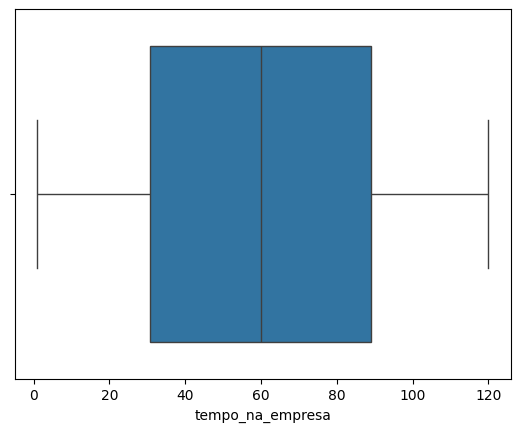

In [13]:
# Verificar outliers
sns.boxplot(data=df_salario_eda, x="tempo_na_empresa")

<Axes: xlabel='nivel_na_empresa'>

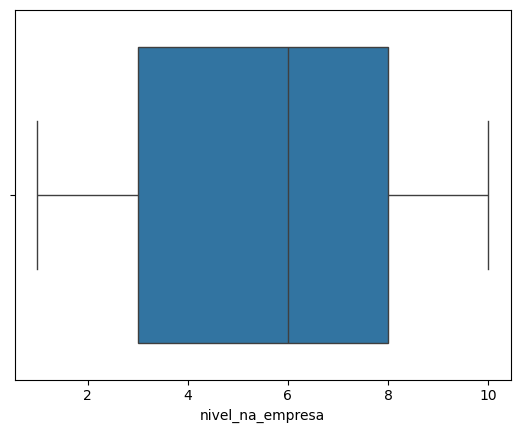

In [14]:
sns.boxplot(data=df_salario_eda, x="nivel_na_empresa")

<Axes: xlabel='salario_em_reais'>

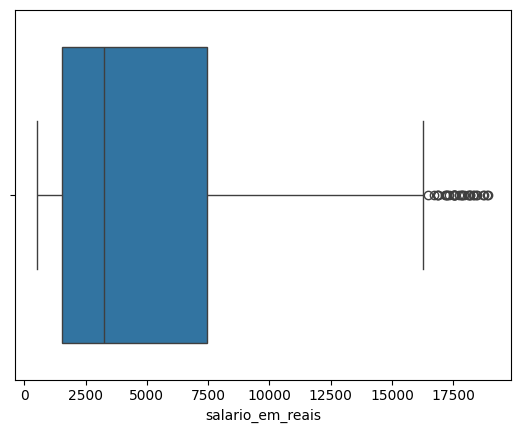

In [16]:
sns.boxplot(data=df_salario_eda, x="salario_em_reais")

<Axes: xlabel='tempo_na_empresa', ylabel='salario_em_reais'>

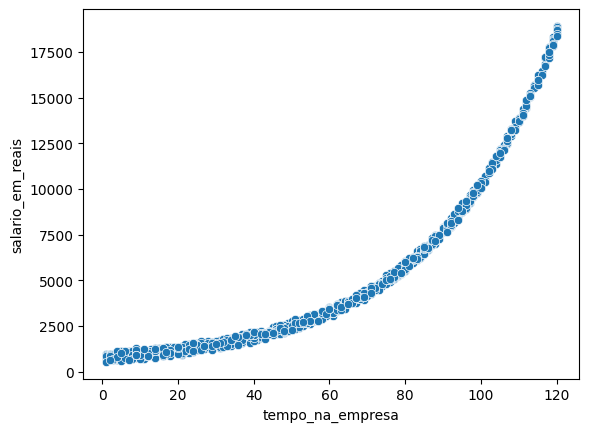

In [17]:
# Cruzamento variáveis numéricas com salário em reais (Variável dependente)
sns.scatterplot(data=df_salario_eda, x="tempo_na_empresa", y="salario_em_reais")

<Axes: xlabel='nivel_na_empresa', ylabel='salario_em_reais'>

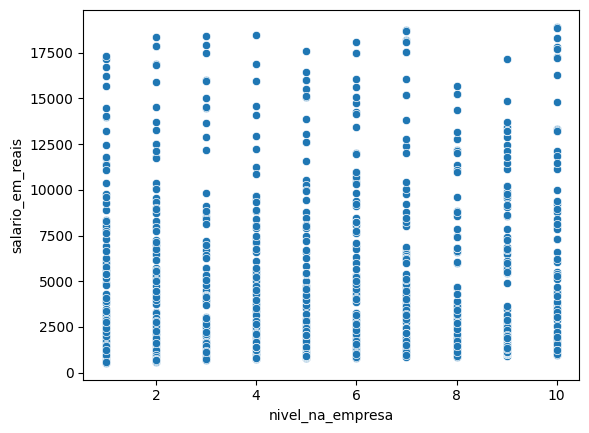

In [18]:
sns.scatterplot(data=df_salario_eda, x="nivel_na_empresa", y="salario_em_reais")

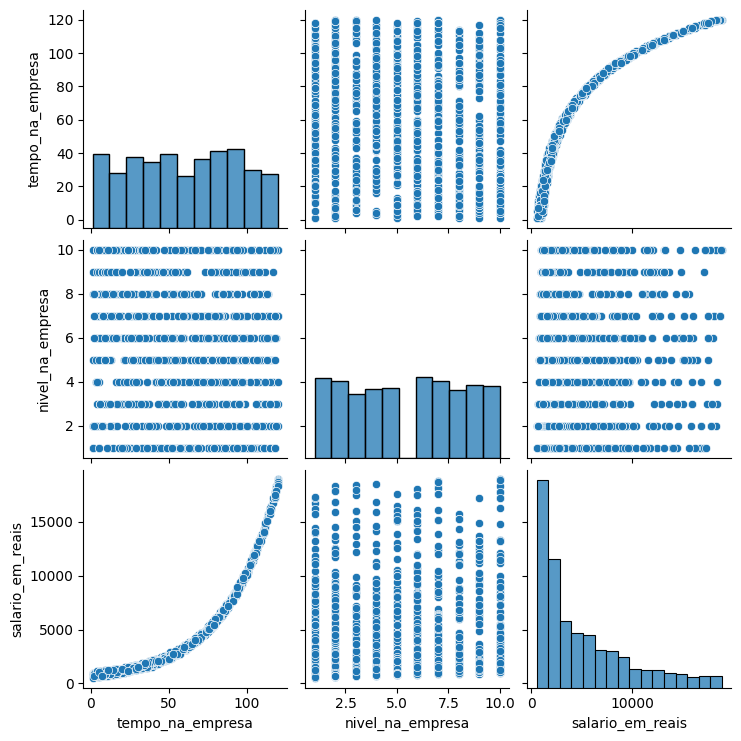

In [19]:
# Histograma das variáveis
sns.pairplot(df_salario_eda)

<Axes: >

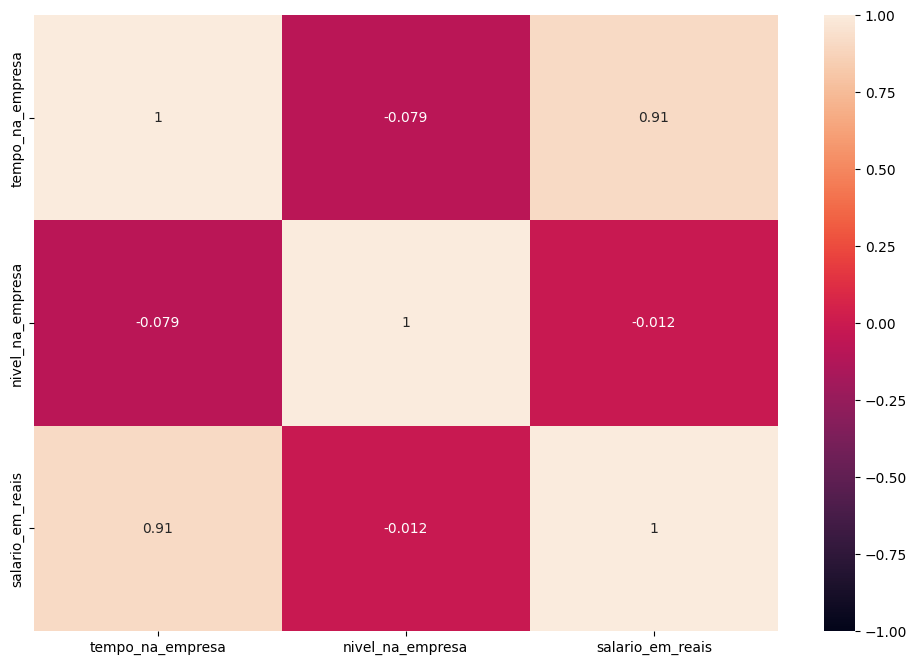

In [24]:
# Mapa de Calor
plt.figure(figsize=(12, 8))
sns.heatmap(df_salario_eda.corr(), vmin=-1, vmax=1, annot=True)

Vemos que salario e tempo de empresa tem alguma correlação linear

<Axes: >

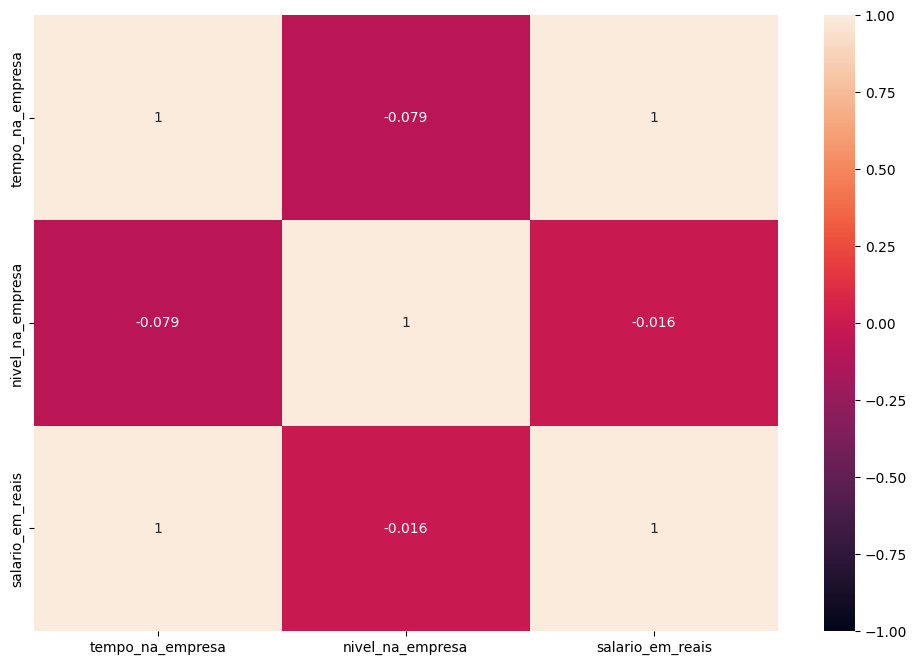

In [23]:
# Mapa de Calor
plt.figure(figsize=(12, 8))
sns.heatmap(df_salario_eda.corr("spearman"), vmin=-1, vmax=1, annot=True)

Vemos que usando spearman que tem um foco também em correlação não lineares

<Axes: >

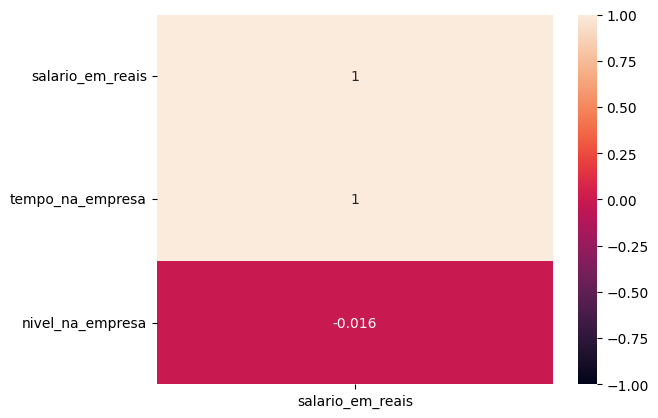

In [27]:
# Formato de Ranking
sns.heatmap(df_salario_eda.corr("spearman")[['salario_em_reais']].sort_values(by="salario_em_reais", ascending=False), vmin=-1, vmax=1, annot=True)

Nível da empresa não está muito correlacionado ao salário, talvez por haver cargos diferentes

In [32]:
# Buckets Tempo de Casa
bins_tempo_casa = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120,130]
labels_tempo_casa = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99', '100-109', '110-119', '120-129']
df_salario_bucketing['escala_tempo'] = pd.cut(df_salario_bucketing['tempo_na_empresa'], bins=bins_tempo_casa, labels=labels_tempo_casa, include_lowest=True)
df_salario_bucketing.head(20)

,tempo_na_empresa,nivel_na_empresa,salario_em_reais,tempo_casa_bucket,escala_tempo
0,50,1,2288.13,40-49,40-49
1,49,4,2389.84,40-49,40-49
2,39,10,2158.73,30-39,30-39
3,51,1,2341.06,50-59,50-59
4,62,7,3584.20,60-69,60-69
5,105,10,12102.18,100-109,100-109
6,80,3,5723.35,70-79,70-79
7,85,2,6424.92,80-89,80-89
8,66,5,3916.18,60-69,60-69
9,73,5,4751.79,70-79,70-79


<Axes: xlabel='escala_tempo', ylabel='salario_em_reais'>

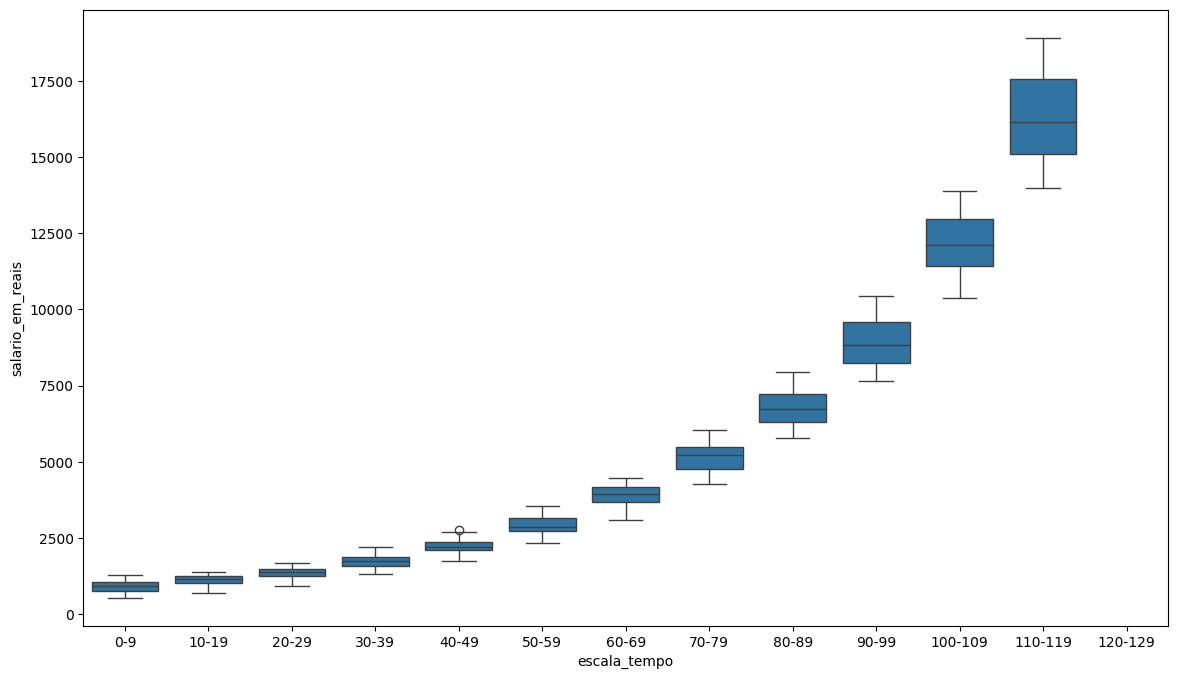

In [33]:
plt.figure(figsize=(14, 8))
sns.boxplot(df_salario_bucketing, x="escala_tempo", y="salario_em_reais")

# Treinar Modelo Linear

In [34]:
# Importar Bibliotecas
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [35]:
# Criar o dataset de treino e teste
X = df_salario.drop(columns='salario_em_reais', axis=1)
y = df_salario['salario_em_reais']

In [36]:
# Split usando KFold com 5 pastas/splits
kf = KFold(n_splits=5, shuffle=True, random_state=51)

In [47]:
# Bloco para treinamento do modelo

# Pipeline
# Padronização das variáveis numéricas - tempo_na_empresa e nivel_na_empresa

# Nome das colunas numéricas
colunas_numericas = ["tempo_na_empresa", "nivel_na_empresa"]

# Transformer para Colunas Numéricas
transformer_numericas = Pipeline(steps=[
  ('scaler', StandardScaler())
])

# Criar um ColumnTransformer
preprocessor = ColumnTransformer(
  transformers=[
    ('num', transformer_numericas, colunas_numericas)
  ]
)

# Criando o Pipeline principal = Pré-processamento + Treinamento
model_regr = Pipeline(steps=[
  ('preprocessor', preprocessor),
  ('regressor', LinearRegression())
])

# Armazenar RMSE Treino e Teste
rmse_score_fold_train = []
rmse_score_fold_test = []

# Armazenar R2 Score de Teste
r2_score_fold_test = []

# Armazenar Resíduos 
residuos = []

# Armazenar Predições
y_pred_total = []

for train_index, test_index in kf.split(X):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]
  
  # Treine o modelo no conjunto de treinamento
  model_regr.fit(X_train, y_train)
  
  # Faça predições nos conjuntos de treinamento e teste
  y_train_pred = model_regr.predict(X_train)
  y_test_pred = model_regr.predict(X_test)
  
  # Calcule o RSME para os conjuntos de treinamento e teste
  rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
  rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
  
  # Calcule o R2Score para os conjuntos de teste
  r2_score_test = r2_score(y_test, y_test_pred)
  
  # Calcule os residuos para os conjuntos de teste
  residuos_test = np.array(y_test - y_test_pred)
  
  # Armazenar RMSE Treino e Teste
  rmse_score_fold_train.append(rmse_train)
  rmse_score_fold_test.append(rmse_test)

  # Armazenar R2 Score de Teste
  r2_score_fold_test.append(r2_score_test)
  
  # Armazenar Resíduos 
  residuos.append(residuos_test)

  # Armazenar Predições
  y_pred_total.append(y_test_pred)
  
rmse_train_final = np.mean(rmse_score_fold_train)
rmse_test_final = np.mean(rmse_score_fold_test)
r2_score_test_final = np.mean(r2_score_fold_test)
residuos_final = np.concatenate(residuos)
y_pred_total_final = np.concatenate(y_pred_total)
percentual_rmse = ((rmse_test_final - rmse_train_final)/rmse_train_final)*100
residuos = np.array(residuos).reshape(-1)
y_pred_total = np.array(y_pred_total).reshape(-1)


# Analises de Métricas 

In [48]:
print(f'RMSE Treino: {rmse_train_final}')
print(f'RMSE Teste: {rmse_test_final}')
print(f'R2 Score Teste: {r2_score_test_final}')
print(f'Percentual Diff RMSE Treino e Teste: {percentual_rmse}')

RMSE Treino: 1882.8318426651392
RMSE Teste: 1886.4504221336076
R2 Score Teste: 0.8261178870584762
Percentual Diff RMSE Treino e Teste: 0.19218813844503052


## Análise de Resíduos - Modelo Linear

In [49]:
# Transformar residuos na escala padrão
# (X - media) / desvio_padrão
from scipy.stats import zscore
residuos_std = zscore(residuos_final)
residuos_std

array([ 5.95616525e-01, -7.24916727e-01, -6.46846433e-01,  8.64095533e-01,
       -5.33806156e-02, -7.61704833e-01,  6.80947606e-01,  1.45661295e+00,
        3.15407488e-01, -5.85616590e-01,  1.29483240e-01,  8.62850152e-01,
       -8.81408422e-01, -2.57676835e-01, -3.98447700e-01,  4.84215194e-01,
       -9.30147928e-01, -1.98427398e-01,  2.09007896e-01, -9.04965560e-01,
       -6.81287606e-02, -8.34446292e-01, -3.95656924e-01,  1.85180868e-01,
       -8.59767063e-01, -1.16014546e+00, -9.89137623e-01,  1.98282340e+00,
       -7.09136535e-01, -5.86755306e-01,  2.97904569e+00,  3.41834809e-01,
       -1.07716414e+00,  1.30248304e+00, -5.99662310e-01, -4.35883427e-01,
       -5.78726106e-01, -1.02611646e+00,  3.62850210e-01,  1.01353539e+00,
       -3.51902591e-01,  9.50243614e-01,  1.10020428e+00,  3.93453210e-01,
       -8.28856918e-02, -2.86114598e-01, -1.14814701e+00, -7.64435745e-01,
       -2.96268121e-01, -9.37004031e-01, -5.80106334e-01,  4.60575328e-02,
       -2.64983022e-01,  

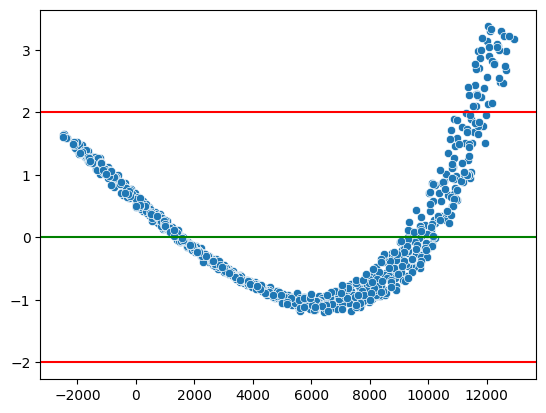

In [50]:
# Verificar a linearidade dos residuos: Valores entre -2 e 2 (escala padrão)
# Verificar homoceasticidade dos residuos: Valores em torno da reta sem nenhuma tendencia ou formato
sns.scatterplot(x=y_pred_total, y=residuos_std)
plt.axhline(y=0, color='g', linestyle='-')
plt.axhline(y=2, color='r', linestyle='-')
plt.axhline(y=-2, color='r', linestyle='-')


Não há linearidade nem homoceasticidade

Text(0, 0.5, 'Resíduos na escala padrão')

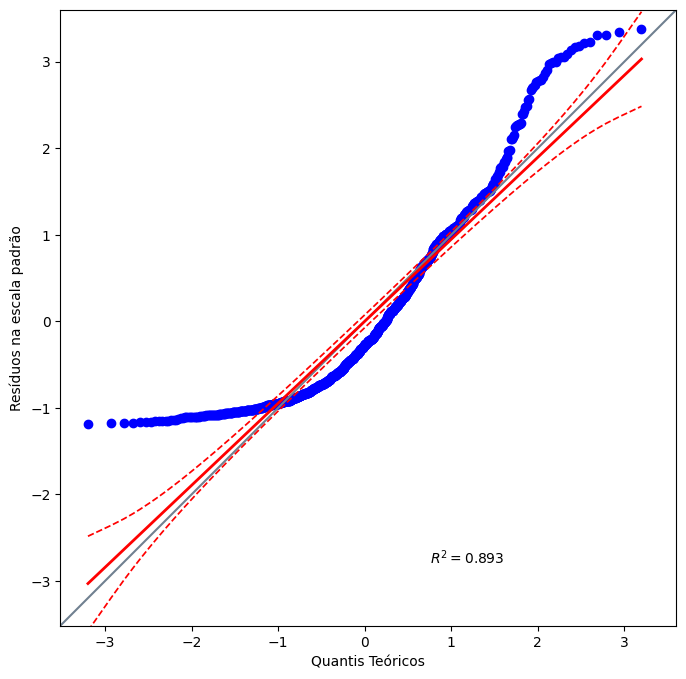

In [51]:
# Checar se residuos seguem uma distribuição normal
# QQ Plot
import pingouin as pg
plt.figure(figsize=(12, 8))
pg.qqplot(residuos_std, dist='norm', confidence=.95)
plt.xlabel('Quantis Teóricos')
plt.ylabel('Resíduos na escala padrão')

In [52]:
# Teste de Normalidade - Shapiro-Wilk
from scipy.stats import shapiro, kstest
from statsmodels.stats.diagnostic import lilliefors

stat_shapiro, p_shapiro = shapiro(residuos)
print(f'Stat Shapiro: {stat_shapiro}, p-valor: {p_shapiro}')

Stat Shapiro: 0.8919699788093567, p-valor: 7.01491848258423e-26


In [53]:
# Teste de Normalidade - Kolmogorov-Smirnov
stat_ks, p_ks = kstest(residuos, "norm")
print(f'Stat Kolmogorov-Smirnov: {stat_ks}, p-valor: {p_ks}')

Stat Kolmogorov-Smirnov: 0.5939999999999955, p-valor: 0.0


In [54]:
# Teste de Normalidade - Lilliefors
stat_lilliefors, p_lilliefors = lilliefors(residuos, dist="norm", pvalmethod="table")
print(f'Stat Lilliefors: {stat_lilliefors}, p-valor: {p_lilliefors}')


Stat Lilliefors: 0.11825983774680093, p-valor: 0.0009999999999998899


# Treinamento do modelo polinomial

In [58]:
# Exemplo de Criação de Features Polinomiais - Engenharia de Features para gerar novas features
feat_poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = feat_poly.fit_transform(X)
feat_poly.feature_names_in_

array(['tempo_na_empresa', 'nivel_na_empresa'], dtype=object)

In [59]:
feat_poly.get_feature_names_out(feat_poly.feature_names_in_)

array(['tempo_na_empresa', 'nivel_na_empresa', 'tempo_na_empresa^2',
       'tempo_na_empresa nivel_na_empresa', 'nivel_na_empresa^2',
       'tempo_na_empresa^3', 'tempo_na_empresa^2 nivel_na_empresa',
       'tempo_na_empresa nivel_na_empresa^2', 'nivel_na_empresa^3'],
      dtype=object)

In [74]:
# Bloco para treinamento do modelo

# Para não termos um overfit vamos testar varios graus de polinomios
graus_polynomial = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

rmse_train_values = []
rmse_test_values = []
percentual_rmse_values = []
r2_score_test_values = []
residuos_values = []

# Split usando KFold com 5 pastas/splits - Validação Cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=51)
model_poly = {}
for grau in graus_polynomial:
  # Pipeline
  # Padronização das variáveis numéricas - tempo_na_empresa e nivel_na_empresa

  # Nome das colunas numéricas
  colunas_numericas = ["tempo_na_empresa", "nivel_na_empresa"]

  # Transformer para Colunas Numéricas
  transformer_numericas = Pipeline(steps=[
    ('scaler', StandardScaler())
  ])

  # Criar um ColumnTransformer
  preprocessor = ColumnTransformer(
    transformers=[
      ('num', transformer_numericas, colunas_numericas)
    ]
  )
  
  # Criar Features Polinomiais
  poly_feat = PolynomialFeatures(degree=grau, include_bias=False)

  # Criando o Pipeline principal = Pré-processamento + Treinamento
  model_poly[grau] = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('poly_features', poly_feat),
    ('regressor', LinearRegression())
  ])

  # Armazenar RMSE Treino e Teste
  rmse_score_fold_train = []
  rmse_score_fold_test = []

  # Armazenar R2 Score de Teste
  r2_score_fold_test = []

  # Armazenar Resíduos 
  residuos = []

  # Armazenar Predições
  y_pred_total = []

  for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Treine o modelo no conjunto de treinamento
    model_poly[grau].fit(X_train, y_train)
    
    # Faça predições nos conjuntos de treinamento e teste
    y_train_pred = model_poly[grau].predict(X_train)
    y_test_pred = model_poly[grau].predict(X_test)
    
    # Calcule o RSME para os conjuntos de treinamento e teste
    rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
    rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
    
    # Calcule o R2Score para os conjuntos de teste
    r2_score_test = r2_score(y_test, y_test_pred)
    
    # Calcule os residuos para os conjuntos de teste
    residuos_test = np.array(y_test - y_test_pred)
    
    # Armazenar RMSE Treino e Teste
    rmse_score_fold_train.append(rmse_train)
    rmse_score_fold_test.append(rmse_test)

    # Armazenar R2 Score de Teste
    r2_score_fold_test.append(r2_score_test)
    
    # Armazenar Resíduos 
    residuos.append(residuos_test)

    # Armazenar Predições
    y_pred_total.append(y_test_pred)
    
  rmse_train_final = np.mean(rmse_score_fold_train)
  rmse_test_final = np.mean(rmse_score_fold_test)
  r2_score_test_final = np.mean(r2_score_fold_test)
  residuos_final = np.concatenate(residuos)
  y_pred_total_final = np.concatenate(y_pred_total)
  percentual_rmse = ((rmse_test_final - rmse_train_final)/rmse_train_final)*100
  residuos = np.array(residuos).reshape(-1)
  y_pred_total = np.array(y_pred_total).reshape(-1)
  
  rmse_train_values.append(rmse_train_final)
  rmse_test_values.append(rmse_test_final)
  percentual_rmse_values.append(percentual_rmse)
  r2_score_test_values.append(r2_score_test_final)
  residuos_values.append(residuos_final)


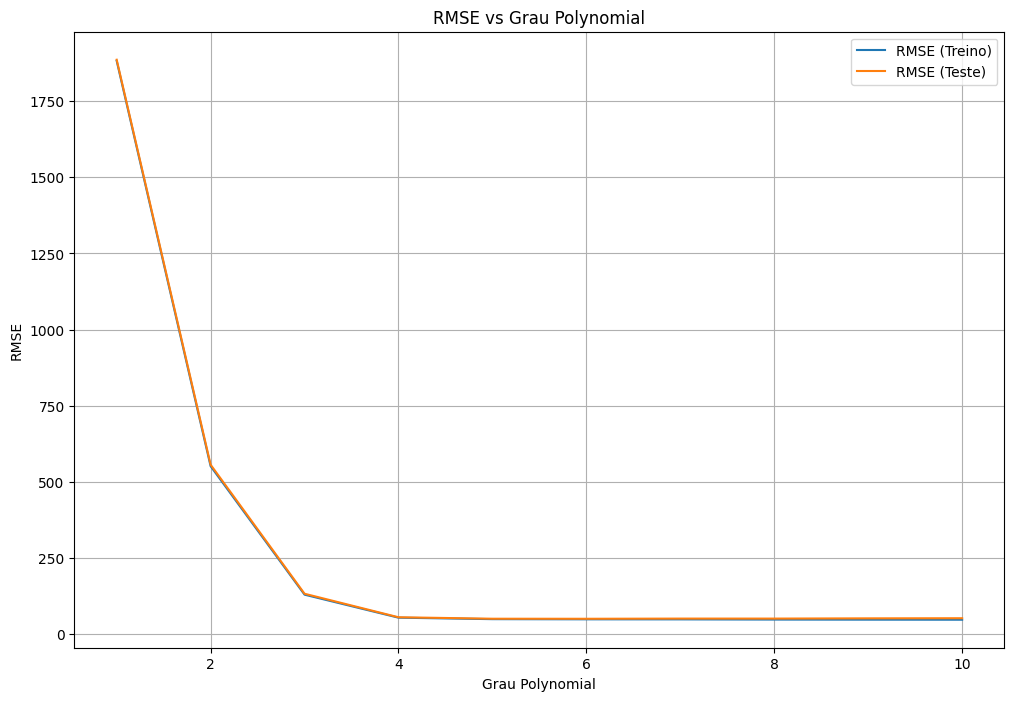

In [68]:
# Plotar Gráfico 
plt.figure(figsize=(12, 8))
plt.plot(graus_polynomial,rmse_train_values,label='RMSE (Treino)')
plt.plot(graus_polynomial,rmse_test_values,label='RMSE (Teste)')
plt.xlabel('Grau Polynomial')
plt.ylabel('RMSE')
plt.title('RMSE vs Grau Polynomial')
plt.legend()
plt.grid(True)

Vemos que as linhas estão bem sobrepostas e que a partir do polinomio 4 temos um erro estabilizado

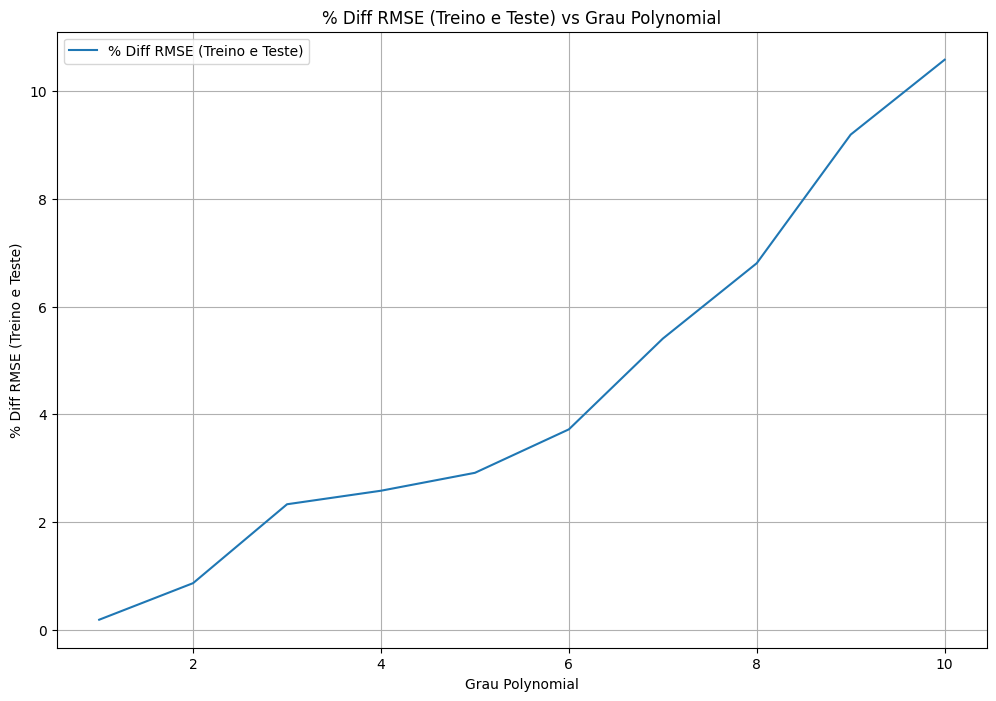

In [65]:
# Plotar Gráfico para comparar #Dif RMSE (Treino e Teste)
plt.figure(figsize=(12, 8))
plt.plot(graus_polynomial,percentual_rmse_values,label='% Diff RMSE (Treino e Teste)')
plt.xlabel('Grau Polynomial')
plt.ylabel('% Diff RMSE (Treino e Teste)')
plt.title('% Diff RMSE (Treino e Teste) vs Grau Polynomial')
plt.legend()
plt.grid(True)

In [73]:
# Modelo escolhido é o de grau 4
model_poly_final = model_poly[4]
model_poly_final


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['tempo_na_empresa',
                                                   'nivel_na_empresa'])])),
                ('poly_features',
                 PolynomialFeatures(degree=4, include_bias=False)),
                ('regressor', LinearRegression())])

# Análise de Métricas

In [69]:
rmse_train_final = rmse_train_values[3]
rmse_test_final = rmse_test_values[3]
r2_score_test_final = r2_score_test_values[3]
percentual_rmse = percentual_rmse_values[3]

print(f'RMSE Treino: {rmse_train_final}')
print(f'RMSE Teste: {rmse_test_final}')
print(f'R2 Score Teste: {r2_score_test_final}')
print(f'Percentual Diff RMSE Treino e Teste: {percentual_rmse}')

RMSE Treino: 53.32698559565161
RMSE Teste: 54.70504352796331
R2 Score Teste: 0.9998524123039415
Percentual Diff RMSE Treino e Teste: 2.5841661907551643


## Análise de Resíduos - Modelo Polinomial

In [75]:
# Transformar residuos na escala padrão
# (X - media) / desvio_padrão
from scipy.stats import zscore
residuos_final = residuos_values[3]
residuos_std = zscore(residuos_final)
residuos_std

array([-1.76658136e+00,  6.13919903e-01,  4.57932407e-01,  3.77621549e-01,
       -1.77161928e+00, -2.13372467e+00, -2.88053498e-01, -1.15486201e+00,
        1.26076256e+00, -1.38932876e+00, -1.63659072e-01,  9.49916278e-01,
        1.10428797e+00, -1.69277005e+00, -1.55137077e+00,  6.50212053e-01,
        2.39650670e+00, -5.48674224e-01, -4.71815369e-01, -4.93214903e-01,
       -9.93275437e-01,  4.37069649e-01, -2.35827600e-01,  4.45720599e-01,
        1.40041227e-01, -2.28929917e+00,  3.58302195e-01,  6.15006495e-01,
        1.42514234e+00, -1.40851950e+00,  1.28177409e+00, -1.47234024e-01,
       -3.60957871e-01, -9.30096879e-02,  3.81531150e-01,  1.24092430e-01,
       -3.96949408e-01,  8.01984667e-01, -1.66729377e+00, -3.61968959e-01,
        1.09965292e+00,  4.53175371e-01, -3.37795185e-01, -6.12203426e-01,
        1.86697658e-01, -1.00712904e+00,  3.94042102e-01,  1.06437582e+00,
       -2.25733503e+00,  1.51520710e+00, -4.44535131e-01,  2.39420946e+00,
       -3.94795656e-01, -

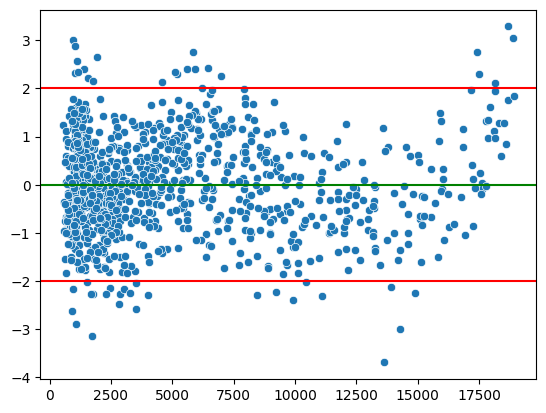

In [76]:
# Verificar a linearidade dos residuos: Valores entre -2 e 2 (escala padrão)
# Verificar homoceasticidade dos residuos: Valores em torno da reta sem nenhuma tendencia ou formato
sns.scatterplot(x=y_pred_total, y=residuos_std)
plt.axhline(y=0, color='g', linestyle='-')
plt.axhline(y=2, color='r', linestyle='-')
plt.axhline(y=-2, color='r', linestyle='-')


Não há linearidade nem homoceasticidade

Text(0, 0.5, 'Resíduos na escala padrão')

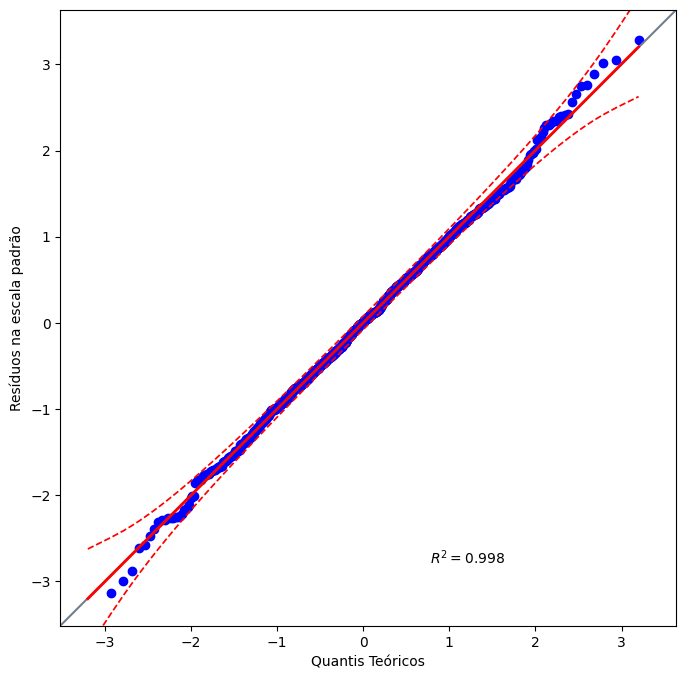

In [77]:
# Checar se residuos seguem uma distribuição normal
# QQ Plot
import pingouin as pg
plt.figure(figsize=(12, 8))
pg.qqplot(residuos_std, dist='norm', confidence=.95)
plt.xlabel('Quantis Teóricos')
plt.ylabel('Resíduos na escala padrão')

In [78]:
# Teste de Normalidade - Shapiro-Wilk
from scipy.stats import shapiro, kstest
from statsmodels.stats.diagnostic import lilliefors

stat_shapiro, p_shapiro = shapiro(residuos)
print(f'Stat Shapiro: {stat_shapiro}, p-valor: {p_shapiro}')

Stat Shapiro: 0.9978763461112976, p-valor: 0.23464509844779968


In [79]:
# Teste de Normalidade - Kolmogorov-Smirnov
stat_ks, p_ks = kstest(residuos, "norm")
print(f'Stat Kolmogorov-Smirnov: {stat_ks}, p-valor: {p_ks}')

Stat Kolmogorov-Smirnov: 0.4973017564265494, p-valor: 4.902535973611947e-229


In [80]:
# Teste de Normalidade - Lilliefors
stat_lilliefors, p_lilliefors = lilliefors(residuos, dist="norm", pvalmethod="table")
print(f'Stat Lilliefors: {stat_lilliefors}, p-valor: {p_lilliefors}')


Stat Lilliefors: 0.02570777401585178, p-valor: 0.1614666578715505


## Predições individuais

In [85]:
input_feature = {
  "tempo_na_empresa": 80,
  "nivel_na_empresa": 5
}
pred_df = pd.DataFrame(input_feature, index=[1])

In [86]:
# Predição
model_poly_final.predict(pred_df)

array([5747.79896506])

In [87]:
import joblib
joblib.dump(model_poly_final, 'modelo_salario.pkl')

['modelo_salario.pkl']